# **GRIP** 
# **The Sparks Foundation**
# Task 3:
# Exploratory Data Analysis - Retail


## **By: Suryakumar.B**

In [ ]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PowerTransformer

In [ ]:

df=pd.read_csv('SampleSuperstore.csv')

print('Data imported sucessfully. \n')

df.head()

Data imported sucessfully. 



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df['Total']=df['Sales']+df['Profit']

In [ ]:
df_num=df[['Sales','Profit','Discount','Total']]
df_cat=df.drop(list(df_num.columns),axis=1)

In [ ]:
df_num.describe()

,Sales,Profit,Discount,Total
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,258.514897
std,623.245101,234.260108,0.206452,763.675616
min,0.444000,-6599.978000,0.000000,-2099.993000
25%,17.280000,1.728750,0.000000,19.742400
50%,54.490000,8.666500,0.200000,62.805600
75%,209.940000,29.364000,0.200000,230.263875
max,22638.480000,8399.976000,0.800000,25899.926000


In [ ]:
for i in df_cat.columns:
  print('\n',i,'\n\n')
  print(df_cat[i].value_counts(),'\n\n')
  print(df_cat[i].value_counts(normalize=True))


 Ship Mode 


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 


Standard Class    0.597158
Second Class      0.194617
First Class       0.153892
Same Day          0.054333
Name: Ship Mode, dtype: float64

 Segment 


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64 


Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: Segment, dtype: float64

 Country 


United States    9994
Name: Country, dtype: int64 


United States    1.0
Name: Country, dtype: float64

 City 


New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64 


New York City      0.091555
Los Angeles        0.074745
Philadelphia       0.053732
San Franc

In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Total           0
dtype: int64

In [ ]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
ul=(q3+(1.5*iqr))
ll=(q1-(1.5*iqr))
outliers=df[~((df>ul)|(df<ll))]
outliers

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2.0,0.00,41.9136,303.8736
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,NaN,3.0,0.00,NaN,NaN
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2.0,0.00,6.8714,21.4914
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,NaN,5.0,0.45,NaN,NaN
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2.0,0.20,2.5164,24.8844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3.0,0.20,4.1028,29.3508
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2.0,0.00,15.6332,107.5932
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2.0,0.20,19.3932,277.9692
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4.0,0.00,13.3200,42.9200


In [ ]:
outliers.isna().sum()

Ship Mode          0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Category           0
Sub-Category       0
Sales           1167
Quantity         170
Discount         856
Profit          1881
Total           1172
dtype: int64

In [ ]:
df_new=outliers.dropna()

In [ ]:
df_num=df_new[['Sales','Profit','Total']]

df_cat=df_new.drop(['Country','City','Postal Code','Sales','Profit','Total'],axis=1)

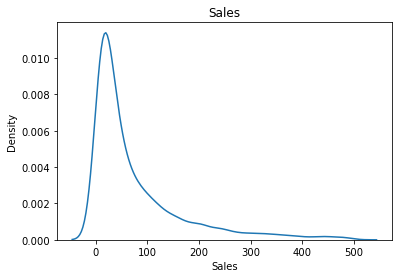

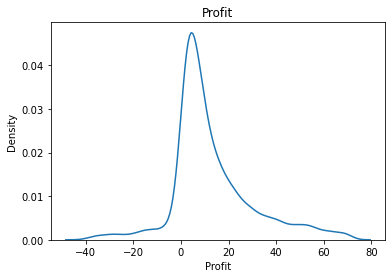

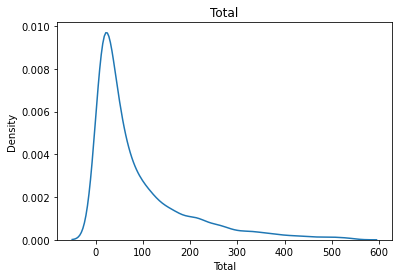

In [ ]:
for i in df_num.columns:
  sns.kdeplot(x=df_num[i])
  plt.title(i)
  plt.show()


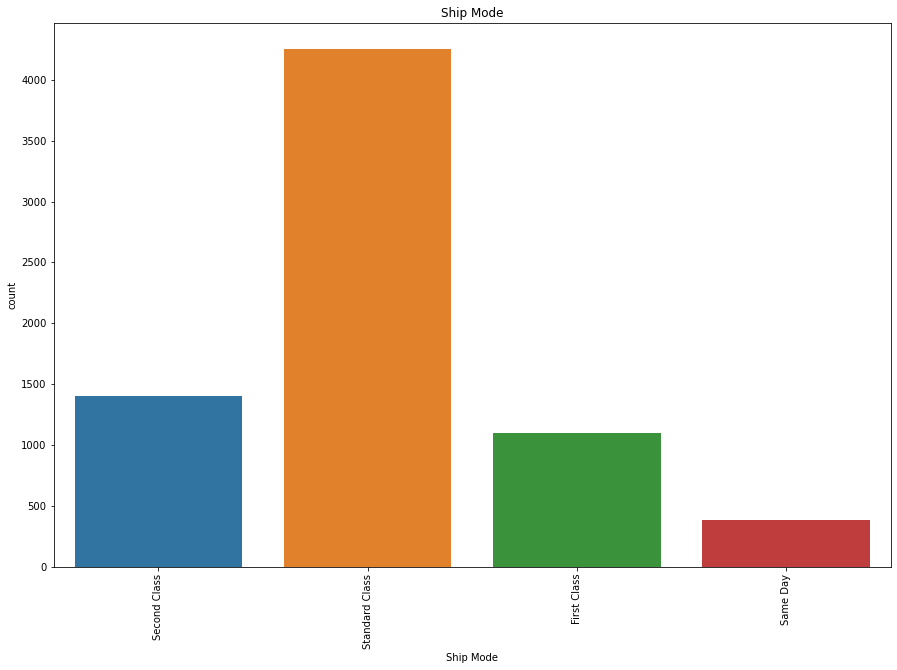

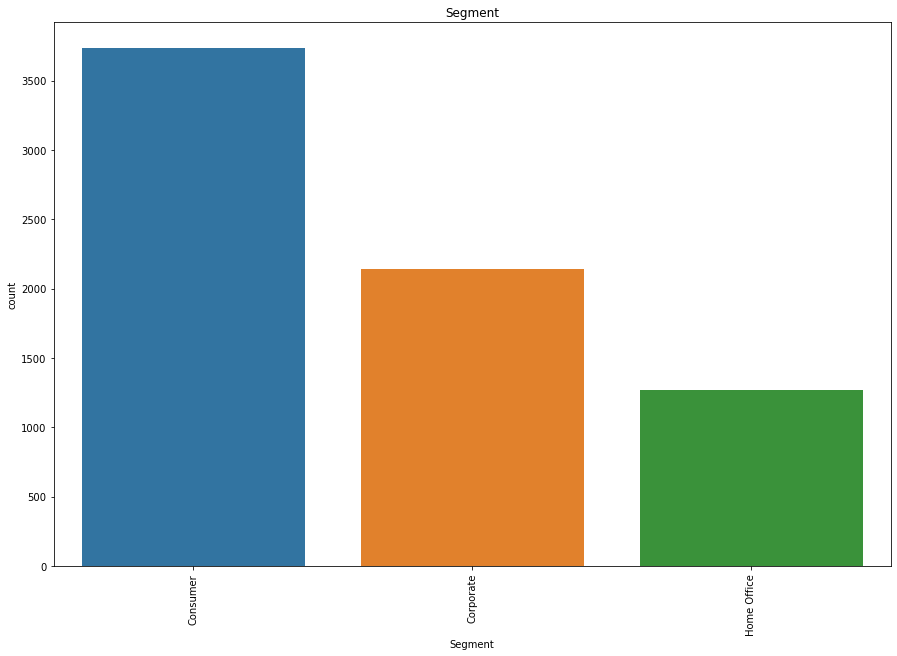

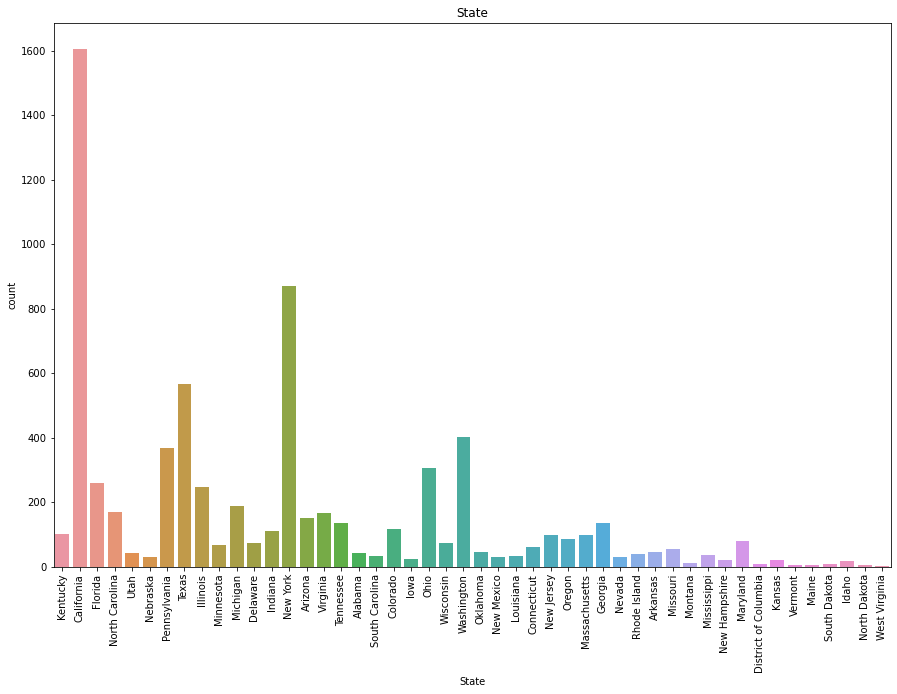

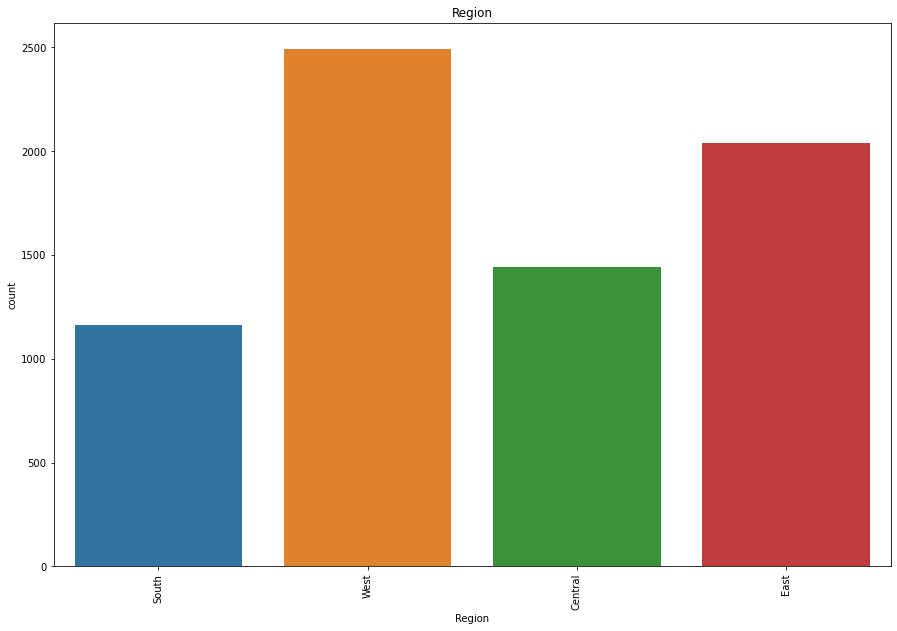

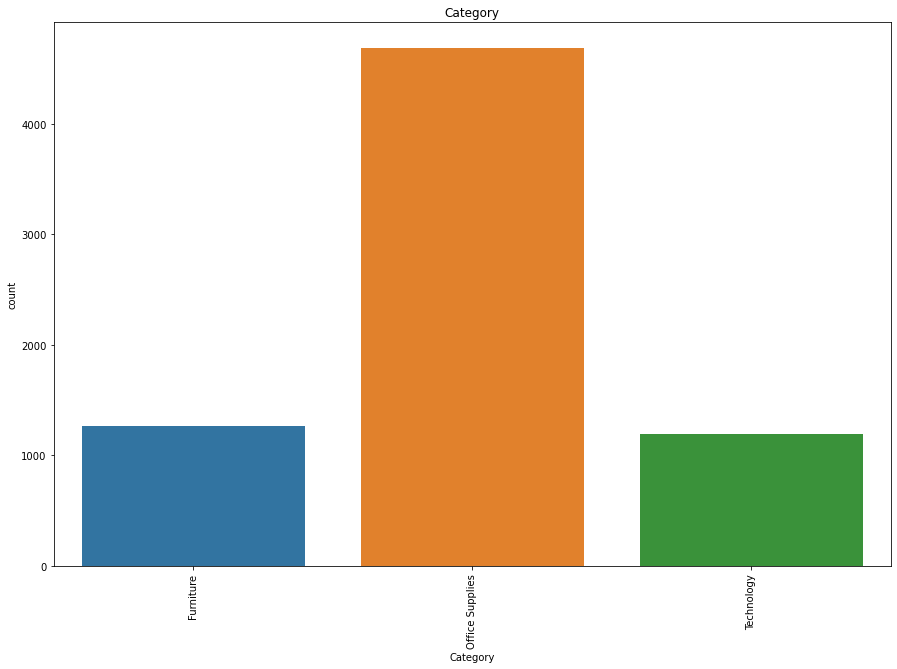

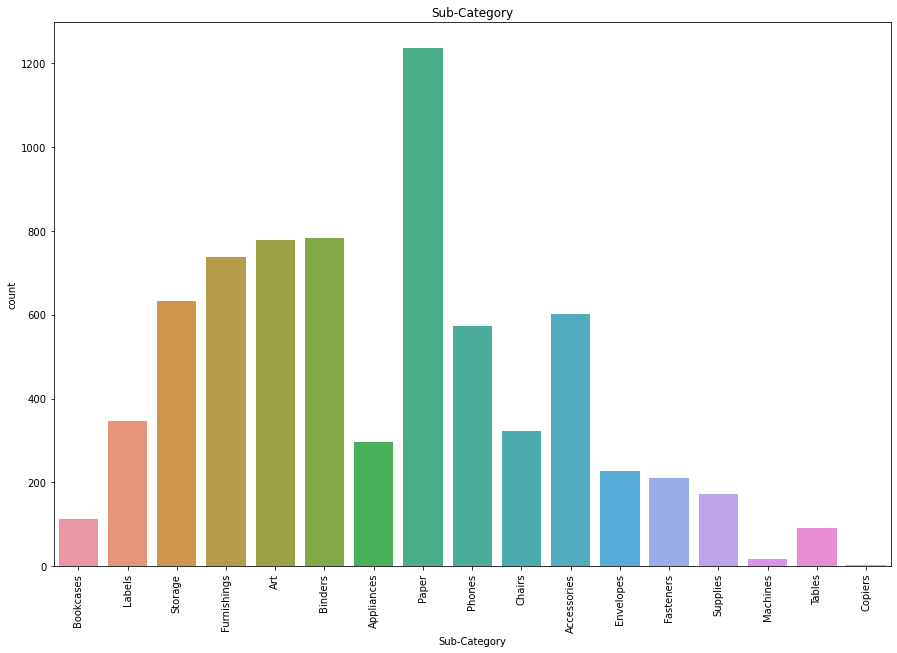

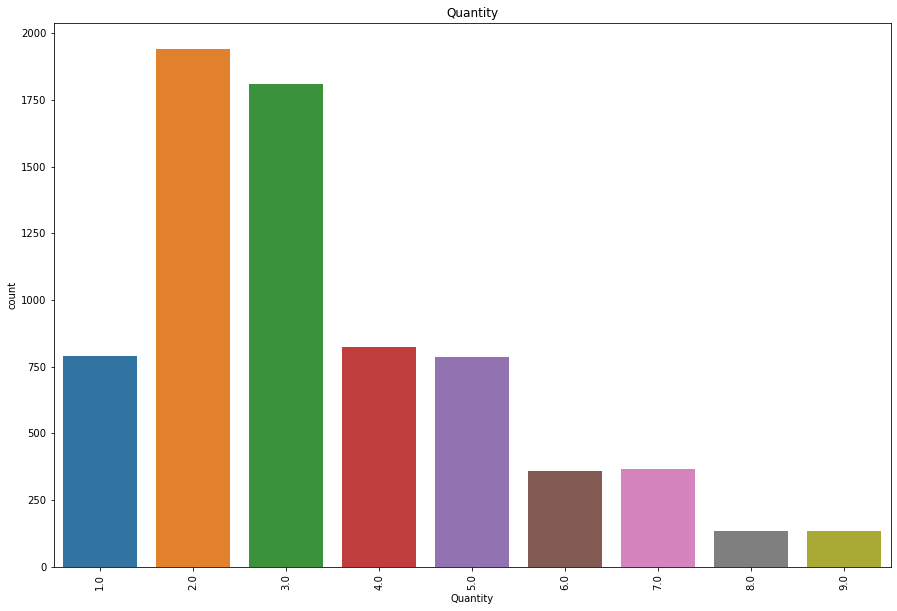

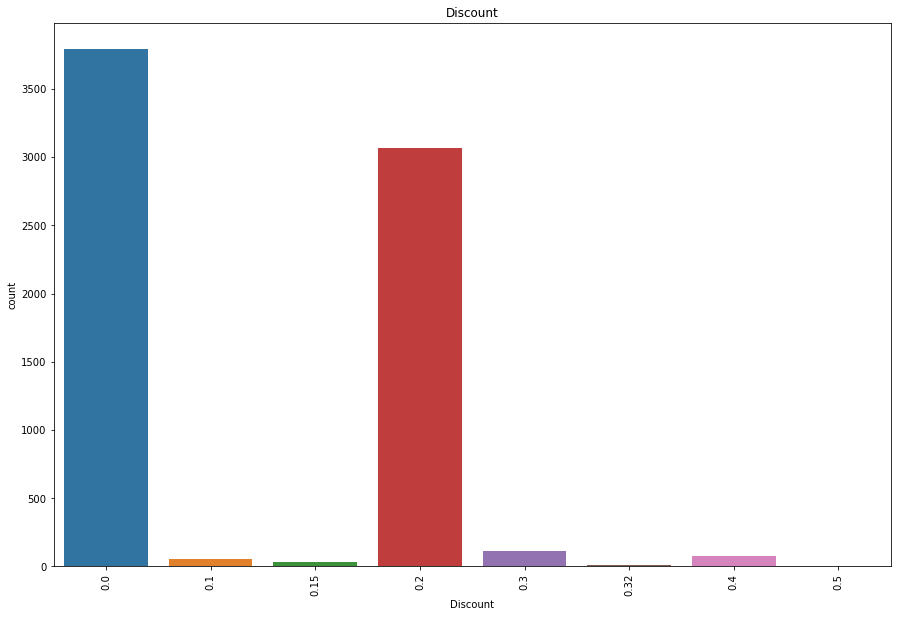

In [ ]:

for i in df_cat.columns:
    plt.figure(figsize=(15,10))
    sns.countplot(x=df_cat[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,303.8736
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,951.5220
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,21.4914
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,574.5465
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,24.8844


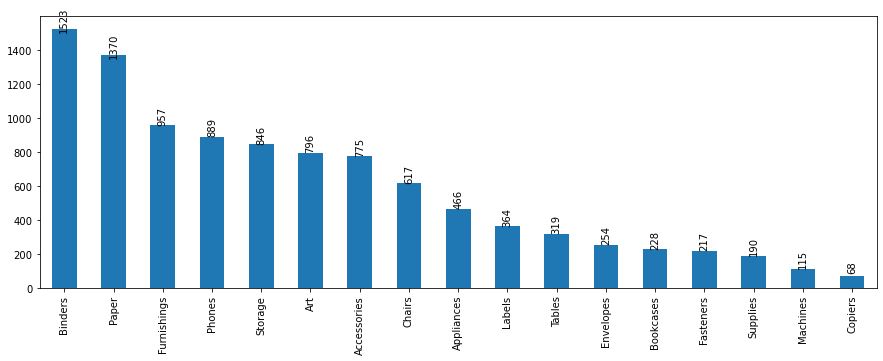

In [ ]:
plt.figure(figsize=(15,5))
ax = df['Sub-Category'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=90)

plt.show()

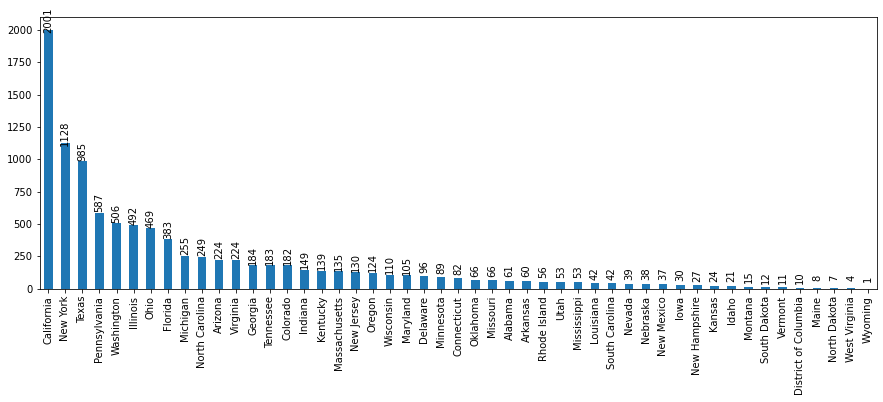

In [ ]:
plt.figure(figsize=(15,5))
ax = df['State'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=90)

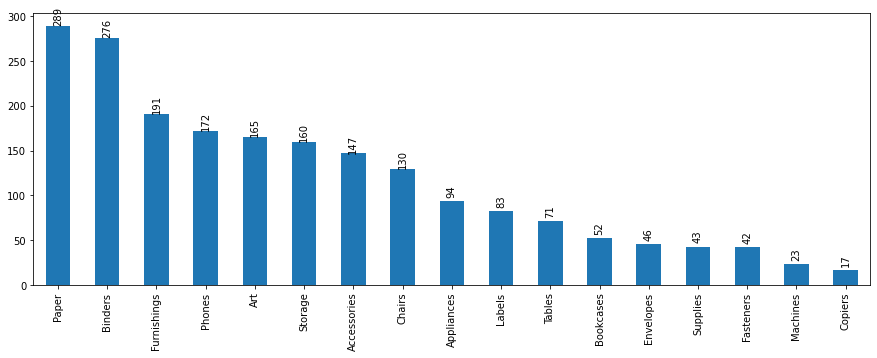

In [ ]:
plt.figure(figsize=(15,5))
ax=df[df['State']=="California"]['Sub-Category'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=90)

In [ ]:
#As a business manager, try to find out the weak areas where you can work to make more profit.

df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,303.8736
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,951.5220
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,21.4914
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,574.5465
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,24.8844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,29.3508
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,107.5932
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,277.9692
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,42.9200


In [ ]:
df[df['Category']=='Furniture']['State'].value_counts()

California              444
New York                236
Texas                   202
Pennsylvania            125
Illinois                123
Washington              114
Ohio                     93
Florida                  85
Virginia                 52
Colorado                 51
Michigan                 50
Arizona                  49
Tennessee                45
North Carolina           42
Massachusetts            33
Georgia                  32
Wisconsin                32
Kentucky                 30
Maryland                 28
New Jersey               26
Indiana                  23
Oregon                   21
Delaware                 18
Rhode Island             16
Oklahoma                 15
Minnesota                13
Connecticut              13
Louisiana                11
Alabama                  11
Missouri                 11
Mississippi               9
Arkansas                  9
Nevada                    9
Utah                      7
New Hampshire             6
South Carolina      

In [ ]:
df[df['State']=='West Virginia']

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total
7894,Standard Class,Home Office,United States,Wheeling,West Virginia,26003,East,Office Supplies,Binders,82.400,5,0.0,40.3760,122.7760
7895,Standard Class,Home Office,United States,Wheeling,West Virginia,26003,East,Office Supplies,Binders,6.240,2,0.0,3.0576,9.2976
7896,Standard Class,Home Office,United States,Wheeling,West Virginia,26003,East,Office Supplies,Paper,447.840,8,0.0,219.4416,667.2816
9486,Same Day,Consumer,United States,Wheeling,West Virginia,26003,East,Furniture,Tables,673.344,3,0.3,-76.9536,596.3904


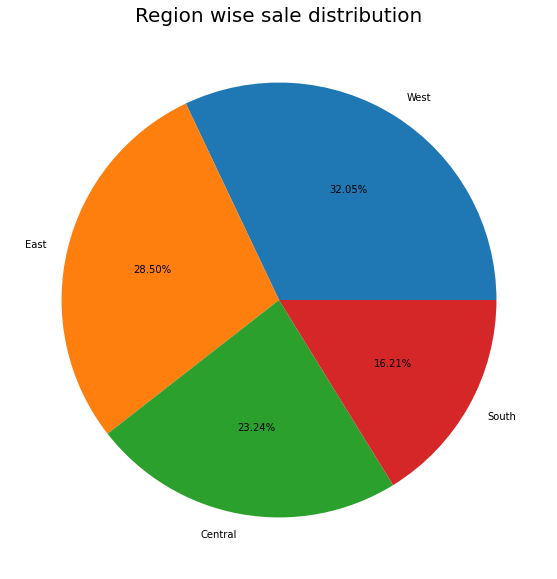

In [ ]:
plt.figure(figsize=(15,10))
df['Region'].value_counts().plot(kind='pie',autopct="%0.2f%%")

plt.title("Region wise sale distribution",fontsize=20)
plt.ylabel("")
plt.show()

* The south region has the lowest sales

In [ ]:
sth = df[df['Region']=="South"]

In [ ]:
sth

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Total
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,303.8736
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,951.5220
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,574.5465
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,24.8844
12,Standard Class,Consumer,United States,Concord,North Carolina,28027,South,Office Supplies,Paper,15.5520,3,0.20,5.4432,20.9952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,Standard Class,Home Office,United States,Smyrna,Georgia,30080,South,Office Supplies,Art,140.7500,5,0.00,42.2250,182.9750
9980,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.9800,1,0.00,22.3548,108.3348
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.9900,1,0.00,28.7964,108.7864
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.1000,5,0.00,55.6470,261.7470


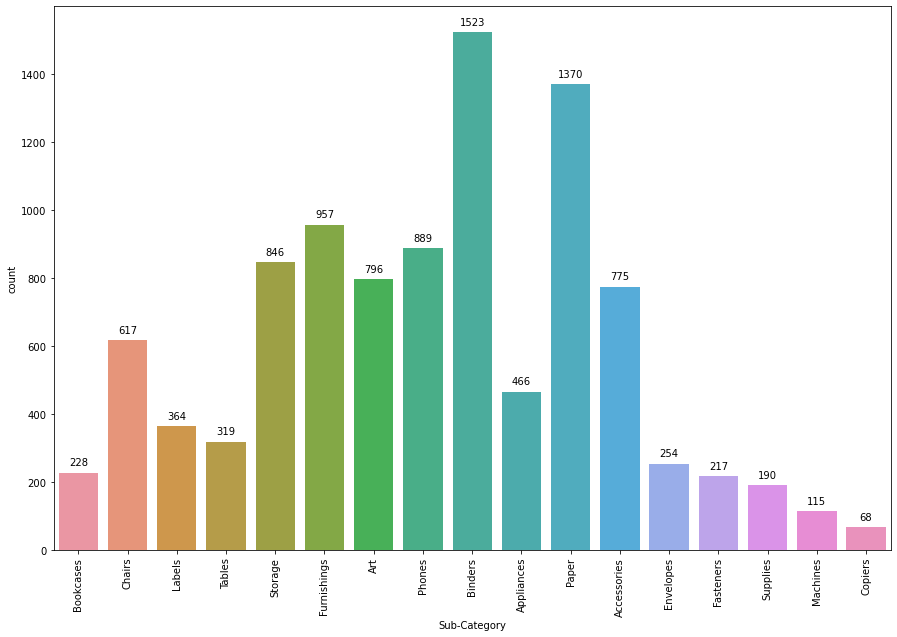

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df['Sub-Category'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=0)

plt.xticks(rotation = 90)
plt.show()